In [1]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('hotel_bookings_data.csv')

In [4]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
22151,Resort Hotel,0,57,2018,May,11,12,2,5,2,0.0,0,Breakfast,Kota Semarang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,8.0,NaN,0,Personal,26.1,0,0,Check-Out
117325,City Hotel,0,13,2019,September,31,30,2,1,3,0.0,0,Breakfast,Kabupaten Garut,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,196.0,0,1,Check-Out
96438,City Hotel,0,165,2018,October,33,9,6,18,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,4,No Deposit,NaN,51.0,0,Personal,106.0,0,0,Check-Out
9455,Resort Hotel,1,43,2018,February,49,1,0,2,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,66.0,0,1,Canceled
77353,City Hotel,1,19,2017,December,41,6,0,3,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,1,1,0,0,Non Refund,82.0,NaN,0,Personal,80.0,0,0,Canceled


## 1. Handle Null Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#check every unique value on column
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
hotel -> 2
is_canceled -> 2
lead_time -> 479
arrival_date_year -> 3
arrival_date_month -> 12
arrival_date_week_number -> 53
arrival_date_day_of_month -> 31
stays_in_weekend_nights -> 17
stays_in_weekdays_nights -> 35
adults -> 14
children -> 5
babies -> 5
meal -> 5
city -> 177
market_segment -> 8
distribution_channel -> 5
is_repeated_guest -> 2
previous_cancellations -> 15
previous_bookings_not_canceled -> 73
booking_changes -> 21
deposit_type -> 3
agent -> 333
company -> 352
days_in_waiting_list -> 128
customer_type -> 4
adr -> 8879
required_car_parking_spaces -> 5
total_of_special_requests -> 6
reservation_status -> 3


In [7]:
#check null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

as we can see there are some columns having null values, we need to replace null value

### For City Column

In [8]:
df.city.value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

because this column is categorical data type and there is a value that has the highest amount and the gap is very far, we can use it's value to replace the null values or we can say it replace with mode value on the column.

In [9]:
#handle null with mode on city column
df['city'] = df['city'].fillna(df['city'].mode()[0])

### For Children Column

In [10]:
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

same case with city column, children column has object data type we can replace null values with mode value on children column

In [11]:
#handle null with mode on children column
df['children'] = df['children'].fillna(df['children'].mode()[0])

### For Agent Column

In [12]:
df.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

agent column has high cardinality and it's data type is categorical, so every agent value represent each code for agent type in hotel business ecosystem. cause the number of null value is too high we can use 'Others' value to represent null values.

<AxesSubplot:xlabel='agent', ylabel='Density'>

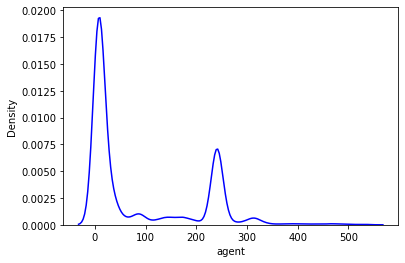

In [13]:
sns.kdeplot(x=df['agent'], color='blue')

In [14]:
#replace null value with "others"
df.agent.fillna("Others", inplace=True)

In [15]:
df.agent.value_counts()

9.0       31961
Others    16340
240.0     13922
1.0        7191
14.0       3640
          ...  
280.0         1
285.0         1
289.0         1
265.0         1
497.0         1
Name: agent, Length: 334, dtype: int64

### For Company Column

Company column has higher missing values until 90% of total rows, we can delete this column because it can make our analysis get bias because this column and hard to represent each missing value.

In [16]:
df.company.value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [17]:
df = df.drop(["company"],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 2. Replace Incorrect Data Entry

Check unique values for every columns to give us best understanding

In [19]:
#check unique values for every columns
for x in df.columns:
  print(f"unik dari {x}")
  print(f"{df[x].unique()}")
  print()

unik dari hotel
['Resort Hotel' 'City Hotel']

unik dari is_canceled
[0 1]

unik dari lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334

There is an unfit value in meal column : "Undefined", it's usually represent "No Meal" in hotel bussiness. So we replace "undefined" value in meal column with "No Meal" as the best representation.

In [20]:
df[df['meal'] == 'Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3106,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.00,0,0,Check-Out
3107,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.00,0,0,Check-Out
3108,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.00,0,0,Check-Out
3110,Resort Hotel,0,62,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0,Family,69.00,0,0,Check-Out
3111,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39870,Resort Hotel,0,81,2019,October,35,27,2,2,2,2.0,0,Undefined,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,Others,0,Personal,351.00,1,2,Check-Out
39874,Resort Hotel,0,191,2019,October,34,24,2,5,2,1.0,0,Undefined,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,196.0,0,Personal,169.98,1,2,Check-Out
39875,Resort Hotel,0,29,2019,October,35,31,0,1,2,1.0,0,Undefined,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,96.0,0,Bussiness,204.00,1,2,Check-Out
39906,Resort Hotel,0,8,2019,October,35,30,0,2,2,0.0,0,Undefined,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,0,Personal,266.06,1,0,Check-Out


In [21]:
df['meal'] = df['meal'].replace('Undefined', 'No Meal')

### 3. Remove Inaprropriate Data

Guest can be representated at column adult, children and babies. We will check the guest on every column if it suitable or not.

For unique value on adult columns there is suspect to be wrong data input like 55, 50, 40, 27, we need to check it.

In [22]:
df[df['adults'].isin([55,50,40,27,26,20,10])].sort_values('adults', ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2173,Resort Hotel,1,338,2017,December,41,4,2,0,55,0.0,0,Dinner,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,Others,0,Bussiness,0.0,0,0,Canceled
1643,Resort Hotel,1,336,2017,November,37,7,1,2,50,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,Others,0,Bussiness,0.0,0,0,Canceled
1539,Resort Hotel,1,304,2017,November,36,3,0,3,40,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,Others,0,Bussiness,0.0,0,0,Canceled
1917,Resort Hotel,1,349,2017,November,39,21,1,3,27,0.0,0,Dinner,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,Others,0,Bussiness,0.0,0,0,Canceled
1962,Resort Hotel,1,352,2017,November,39,24,1,3,27,0.0,0,Dinner,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,Others,0,Bussiness,0.0,0,0,Canceled
1587,Resort Hotel,1,333,2017,November,36,5,2,5,26,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,96.0,0,Bussiness,0.0,0,0,Canceled
1752,Resort Hotel,1,340,2017,November,37,12,2,5,26,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,96.0,0,Bussiness,0.0,0,0,Canceled
1884,Resort Hotel,1,347,2017,November,38,19,2,5,26,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,96.0,0,Bussiness,0.0,0,0,Canceled
2003,Resort Hotel,1,354,2017,November,39,26,2,5,26,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,96.0,0,Bussiness,0.0,0,0,Canceled
2164,Resort Hotel,1,361,2017,December,40,3,2,5,26,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,96.0,0,Bussiness,0.0,0,0,Canceled


As we can see the high number of adults as shown above is all come on 2017 November or December and all of it got canceled, this shown some prove that these booking wrong due to data input error. So we can drop these rows to prevent Global Outlier as well and miss interpretation.

In [23]:
df = df[~df['adults'].isin([55,50,40,27,26,20,10])]
df['adults'].value_counts()

2    89680
1    23027
3     6202
0      403
4       62
5        2
6        1
Name: adults, dtype: int64

Now we will check adults with value 0 and having babies (babies > 0), cause there is no way babies on hotels while no adults. We will drop the rows if any.

In [24]:
df[(df['adults']==0) & (df['babies']>0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
46150,City Hotel,0,6,2017,February,51,18,0,1,0,2.0,1,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Family,77.00,0,2,Check-Out
81375,City Hotel,1,22,2017,February,50,9,1,4,0,2.0,1,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,14.0,0,Personal,80.75,0,1,No-Show
90790,City Hotel,0,14,2018,August,24,9,0,3,0,2.0,1,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,0,Personal,116.49,0,2,Check-Out


In [25]:
#drop rows with 0 adults but have babies
df = df[~((df['adults']==0) & (df['babies']>0))]

Check if there are total guests who are completely empty, because it is impossible if the guests are empty and we will drop this.

In [26]:
df[(df['adults']==0)
  & (df['children']==0)
  & (df['babies']==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,Others,0,Family,0.00,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,Others,0,Personal,0.00,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0.0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0,Family,0.00,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.00,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2019,August,26,27,0,3,0,0.0,0,Breakfast,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,1,No Deposit,7.0,0,Personal,100.80,0,0,Check-Out
115091,City Hotel,0,1,2019,August,26,30,0,1,0,0.0,0,No Meal,Kota Denpasar,Complementary,Direct,0,0,0,0,No Deposit,Others,0,Personal,0.00,1,1,Check-Out
116251,City Hotel,0,44,2019,September,28,15,1,1,0,0.0,0,No Meal,Kota Surabaya,Online TA,TA/TO,0,0,0,2,No Deposit,425.0,0,Personal,73.80,0,0,Check-Out
116534,City Hotel,0,2,2019,September,28,15,2,5,0,0.0,0,No Meal,Kota Jakarta Selatan,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0,Family,22.86,0,1,Check-Out


In [27]:
#drop total guests 0
df = df[~((df['adults']==0) & (df['children']==0) & (df['babies']==0))]

In [28]:
df[df['babies']==9]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78656,City Hotel,0,11,2017,December,42,11,2,1,1,0.0,9,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,1,No Deposit,95.0,0,Family,95.0,0,0,Check-Out


This looks suspicious, because have 9 babies but market_segment is corporate. As we know that corporate is for bussiness use only and usually not allowed to be used for family matters, so we will drop this row by assume this data as a wrong data input.

In [29]:
df = df[~((df['babies']==9))]

In [30]:
df[df['babies']==10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
46619,City Hotel,0,37,2018,March,3,12,0,2,2,0.0,10,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0,Personal,84.45,0,1,Check-Out


This row looks suspicious too, because having 10 babies at once time on just one couple seems impossible. We will categorize this as a global outlier and we will drop this row.

In [31]:
df = df[df['babies']!=10]